In [1]:
# read block assignment file
filename = 'TN_SS.baf'

import pandas
baf = pandas.read_csv( filename, header=None )

In [2]:
# store block assignments as dictionary
labeling = dict()
for index,row in baf.iterrows():
    geoid = row[0]
    geoidstr = str(geoid)
    if len(geoidstr) < 15: # fix errors with leading zero
        geoidstr = '0' + geoidstr
    labeling[geoidstr] = row[1]

In [3]:
# get geopandas dataframe
filepath = 'C:\\districting-data-2020\\'
filename = 'TN_block.shp'

import geopandas as gpd
df = gpd.read_file( filepath + filename )

In [4]:
# add block assignments to column of dataframe
n = len(labeling)
assignment = [ -1 for key in range(n) ]

# pick a position u in the dataframe
for u in range(n):
    geoid = df['GEOID20'][u]
    assignment[u] = labeling[geoid]

In [5]:
import matplotlib.pyplot as plt
df['assignment'] = assignment

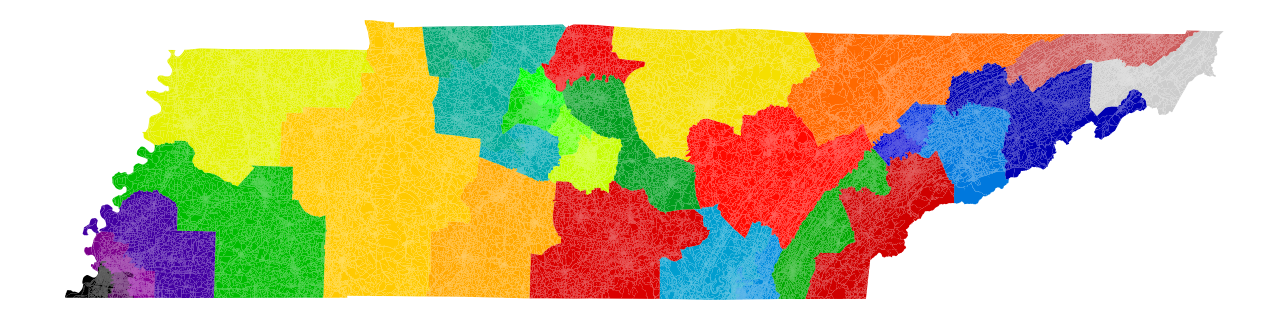

In [6]:
my_fig = df.plot(column='assignment',cmap='nipy_spectral').get_figure()
RESIZE_FACTOR = 3
my_fig.set_size_inches(my_fig.get_size_inches()*RESIZE_FACTOR)
plt.axis('off')
plt.tight_layout()